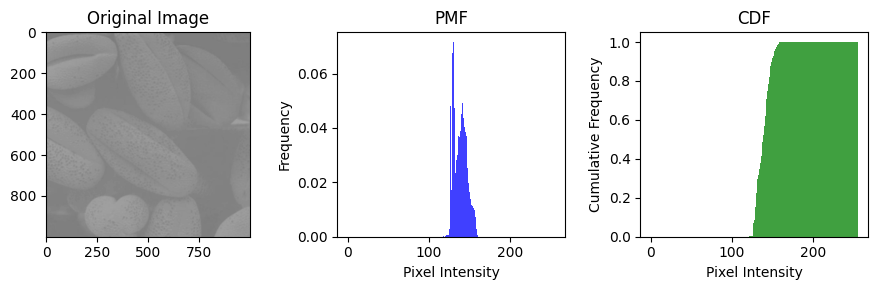

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 讀取圖像並轉為灰階
image = Image.open('bin_gary.jpg').convert('L')  # 將圖像轉為灰階
image_np = np.array(image)  # 轉為 NumPy 陣列格式

# 顯示原始影像
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(image_np, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
# PMF 直方圖
plt.subplot(1, 3, 2)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# CDF 直方圖
plt.subplot(1, 3, 3)
plt.hist(image_np.flatten(), bins=256, range=(0, 255), cumulative=True, density=True, color='green', alpha=0.75)
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()

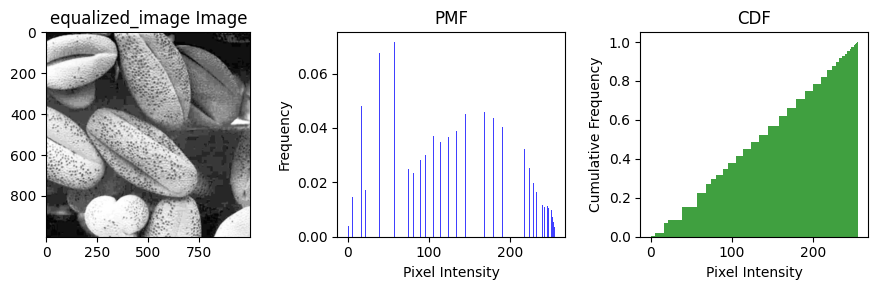

In [4]:
# 計算直方圖和累積分布函數（CDF）
histogram, bins = np.histogram(image_np.flatten(), bins=256, range=[0, 256])
cdf = histogram.cumsum()  # 計算累積分布函數
cdf = cdf / cdf.max()  # 正規化 CDF 到 0~1 範圍

# 設定 r_max 和 r_min
r_max,r_min  = 255,0

# 根據公式 s_k = round(CDF(r_k) * (r_max - r_min))
equalized_image_np = np.round(cdf[image_np] * (r_max - r_min)).astype(np.uint8)

# 儲存等化後的影像
equalized_image = Image.fromarray(equalized_image_np)  # 將 NumPy 陣列轉回 PIL 影像
equalized_image.save('equalized_image.jpg')  # 儲存為 .jpg 檔案

# 顯示原始影像與等化後的影像
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(equalized_image_np, cmap='gray', vmin=0, vmax=255)
plt.title('equalized_image Image')
# PMF 直方圖
plt.subplot(1, 3, 2)
plt.hist(equalized_image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# CDF 直方圖
plt.subplot(1, 3, 3)
plt.hist(equalized_image_np.flatten(), bins=256, range=(0, 255), cumulative=True, density=True, color='green', alpha=0.75)
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()